<a href="https://colab.research.google.com/github/Dalazen/IA/blob/main/Valida%C3%A7%C3%A3o_de_Modelos_Aula_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Problema de classificação

In [ ]:
# Ler o dataset breas-cancer.data, verificar os atributos e a distribuição da classe

In [ ]:
# Converter para 'categorical' todos os atributos do tipo 'object'

In [ ]:
# Obter o cat.codes dos atributos categóricos

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = ?
y = ?

classifiers = {'Arvore': DecisionTreeClassifier(random_state=0),
               'Naive Bayes': GaussianNB(),
               'SVM': SVC(kernel="linear", C=0.025)}

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

for clf in classifiers.items():
    clf[1].fit(X_train, y_train)
    score = clf[1].score(X_test, y_test)
    print(score, clf[0])

In [ ]:
# 2. Validação Cruzada (k fold cross-validation, pode ser bom estratificar)

![grid_search_cross_validation.png](attachment:grid_search_cross_validation.png)

In [ ]:
from sklearn.model_selection import cross_val_score

clf = ?

scores = cross_val_score(clf, X, y, cv=5)

In [ ]:
print(scores)
print("%0.2f de acurácia com desvio padrão de %0.2f" % (?, ?))

In [ ]:
# 3. Precision e Recall

In [ ]:
# P = TP / TP + FP ==> Do total que o algoritmo classificou como positivo, o quanto realmente é positivo?

In [ ]:
# R = TP / TP + FN ==> Do total que realmente é positivo, o quanto o algoritmo conseguiu recuperar?

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

clf = classifiers['Arvore']
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

precision_recall_fscore_support(y_test, preds, average='macro')

In [ ]:
# Para o Naive Bayes

In [ ]:
# Para o SVM

In [ ]:
# 4. Matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, preds)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
# 5. Curva RoC (probabilidade de separação de classes em diferentes limiares)
# Referência: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
# Referência: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

![sphx_glr_plot_roc_001.png](attachment:sphx_glr_plot_roc_001.png)

![1_Uu-t4pOotRQFoyrfqEvIEg.png](attachment:1_Uu-t4pOotRQFoyrfqEvIEg.png)

![1_yF8hvKR9eNfqqej2JnVKzg.png](attachment:1_yF8hvKR9eNfqqej2JnVKzg.png)

In [ ]:
from sklearn.metrics import RocCurveDisplay

ax = plt.gca()
clf = classifiers['Arvore']
clf2 = classifiers['Naive Bayes']
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, alpha=0.8)
svc_disp = RocCurveDisplay.from_estimator(clf2, X_test, y_test)
svc_disp.plot(ax=ax, alpha=0.8)

plt.show()

# Atividade


In [8]:
import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

In [9]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
        'marital-status', 'occupation', 'relationship', 'race',
        'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
        'native-country', 'yearly-income']
df = pd.read_csv('adult.data', index_col=None, names=cols, dtype=str)
df.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
# Convert 'object' to 'categorical'
for c in df.columns:
  if df[c].dtypes == "object":
    df[c] = df[c].astype("category")

In [11]:
# Categorize each categorical variable into number using cat.codes
for c in df.columns:
    if df[c].dtype.name == "category":
        df[c] = df[c].cat.codes
df.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly-income
0,22,7,20429,9,4,4,1,1,4,1,33,0,34,39,0
1,33,6,20691,9,4,2,4,0,4,1,0,0,4,39,0
2,21,4,10268,11,15,0,6,1,4,1,0,0,34,39,0
3,36,4,11553,1,13,2,6,0,2,1,0,0,34,39,0
4,11,4,16170,9,4,2,10,5,2,0,0,0,34,5,0


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
classe = 'yearly-income'

X = df.drop([classe], axis=1)
y = df[classe]

classifiers = {'Decision Tree': DecisionTreeClassifier(random_state=0),
               'Naive Bayes': GaussianNB(),
               'SVM': SVC(kernel="linear", C=0.025)}

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

for clf in classifiers.items():
    clf[1].fit(X_train, y_train)
    score = clf[1].score(X_test, y_test)
    print(score, clf[0])

0.803531669865643 Decision Tree
0.8119769673704414 Naive Bayes
0.7857965451055662 SVM


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support

In [20]:
clf = classifiers['Decision Tree']
scores = cross_val_score(clf, X, y, cv=5)

print(scores)
print(f"Accuracy: {scores.mean()}") 
print(f"Standart Deviation {scores.std()}")

[0.80009212 0.8022113  0.80681818 0.81142506 0.81418919]
Accuracy: 0.8069471716178303
Standart Deviation 0.005327947043276329


In [25]:
clf = classifiers['Decision Tree']
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

precision_recall_fscore_support(y_test, preds, average='macro')

(0.731471767425554, 0.7367961034956501, 0.7340366004245666, None)

In [27]:
clf = classifiers['Naive Bayes']
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

precision_recall_fscore_support(y_test, preds, average='macro')

(0.7453002490449594, 0.7064231136195226, 0.7214254094372647, None)

In [30]:
clf = classifiers['SVM']
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

precision_recall_fscore_support(y_test, preds, average='macro')

(0.7262245092433772, 0.5958143574626227, 0.6062805936384734, None)

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [36]:
confusion_matrix(y_test, preds)

array([[9515,  380],
       [2410,  720]])

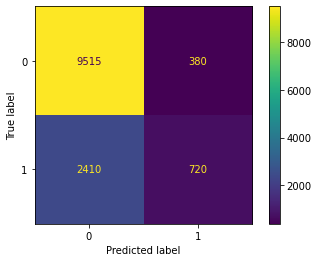

In [35]:
cm = confusion_matrix(y_test, preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

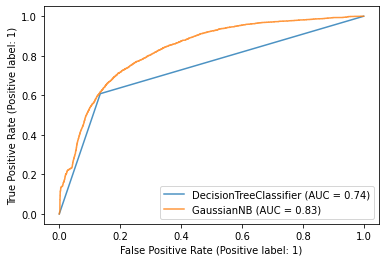

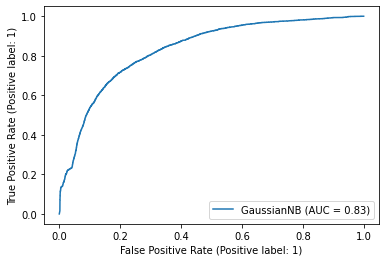

In [38]:
ax = plt.gca()
clf = classifiers['Decision Tree']
clf2 = classifiers['Naive Bayes']
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, alpha=0.8)
svc_disp = RocCurveDisplay.from_estimator(clf2, X_test, y_test)
svc_disp.plot(ax=ax, alpha=0.8)

plt.show()